<h3> Cleaning scraped data. </h3>
<p>
    Ses données on été scrapées sur plusieurs platforms. L'idée c'est de nettoyer ses données et les analyser.
</p>
<h3> Dépendances </h3>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

<h3> Chargement des fichiers de données et creation des DFs </h3>

In [112]:
def readDoorInsider(file_path):
    with open(file_path, encoding='utf-8') as f:
        data = json.load(f)

    result = []
    for df in data:
        general_features = df['features']['Géneral']
        commodites_features = df['features'].get('Commodités', {})
        exposition_features = df['features'].get('Exposition', {})

        surface_terrain = general_features.get('Surface terrain', 0)
        salle_bain = int(general_features.get('Salle(s) de bain', 0)) + int(general_features.get("Salle(s) d'eau", 0))
        terrace = 'Terrasse' in commodites_features or 'Balcon' in exposition_features
        jardin = 'Jardin' in exposition_features
        cuisine = 'Cuisine' in df['features']
        garage_parking = 'Chauffage' in df['features'] or 'Place de parking' in exposition_features

        df['ref']= 'door-' +  df['ref']
        df['surface_terrain']= surface_terrain
        df['nbSalleBain']= salle_bain
        df['terrace/balcon']= terrace
        df['cuisine']= cuisine
        df['jardin']= jardin
        df['garage/parking']= garage_parking
        df['classEnergy']= df['features'].get('classEnergy', 'ND')
        df['gazEmission']= df['features'].get('gazEmission', 'ND')
        df.pop('features', None)

        result.append(df)

    return result


def readImmoRegion(file_path):
    with open(file_path, encoding='utf-8') as f:
        data = json.load(f)

    result = []
    for df in data:
        features = df.pop('features', {})
        if 'ref' in df:
            df['ref']= 'immo-' +  df['ref']
            df['surface_terrain'] = features.get('Surface habitable', 0)
            df['nbSalleBain'] = int(features.get('Salle de bain', 0)) + int(features.get('Salles de douche', 0))
            df['terrace/balcon'] = 'Terrasse' in features or 'Balcon' in features
            df['cuisine'] = 'Cuisine équipée' in features or 'Cuisine ouverte' in features
            df['jardin'] = 'Jardin' in features
            df['garage/parking'] = df['parking'] > 0 or 'Place(s) de parking dans un garage' in features or 'Place(s) de parking en extérieur' in features
            df['classEnergy'] = features.get('Diagnostique de performance énergétique (DPE)Réalisé avant le 1er juillet 2021', 'ND') # à surveiller
            df['gazEmission'] = features.get('Emission de gaz à effet de serre (GES)', 'ND')
            df.pop('parking', None)
            df.pop('codePostale', None)

            result.append(df)

    return result

def readparuVenu(file_path):
    with open(file_path, encoding='utf-8') as f:
        data = json.load(f)

    result = []
    for df in data:
        features = df.get('features', {})
        df['ref']= 'paru-' +  df['ref']
        df['surface_terrain'] = features.get('- Surface du terrain', 0)
        df['chambres'] = features.get('- Nombre de chambre(s)', 0)
        df['nbSalleBain'] = float(features.get('- Nombre de salle(s) de bain', 0)) + float(features.get("- Nombre de salle(s) d'eau", 0))
        df['terrace/balcon'] = True if 'Terrasse' in features else False
        df['jardin'] = True if '- Mobilier de jardin' in features else False
        df['garage/parking'] = True if '- Garage extérieur' in features or '- Parking' in features else False
        df['classEnergy'] = features.get('classEnergy', 'ND')
        df['gazEmission'] = features.get('gazEmission', 'ND')
        df.pop('features', None)
        df.pop('codePostale', None)
        result.append(df)

    return result

In [113]:
file1='../ScrappingV2/doorInsider/output/output.json'
doorInsider = readDoorInsider(file1)
doorInsider

[{'title': 'Loft/Duplex - 3 pièces - 90.13 m² - Champigny-sur-Marne - 94500',
  'url': 'https://www.doorinsider.com/fr/annonces-immobilieres/vente/france/champigny-sur-marne/94500/loft/duplex/3-pieces/id_6609',
  'ref': 'door-6609',
  'ville': 'Champigny-sur-Marne',
  'typeBien': 'Loft/Duplex',
  'price': 279000,
  'surface': 90,
  'pieces': 3,
  'chambres': 2,
  'image': 'https://www.doorinsider.com/sites/default/files/styles/1280x720/public/2022-05/1_DoorInsider_0_65.jpg?itok=i3t5w2FF',
  'description': " Description du bien Coup de coeur pour ce beau T3 en souplex !L'agence Stéphane Plaza vous propose un appartement en parfait état de 90 m² environ avec une terrasse de plus de 12m², comprenant une entrée donnant sur un espace salle à manger cuisine américaine aménagée et équipée, un espace de rangement ainsi qu'un wc. En souplex vous y trouverez un grand séjour avec cour anglaise desservant deux belles chambres dont une avec dressing de 6m², une salle de bain.Cet appartement est au 

In [114]:
file2='../ScrappingV2/immoRegion/output/output.json'
immoRegion = readImmoRegion(file2)
immoRegion

[{'title': '▷ Appartement en vente • Hettange-Grande • 74,19 m² • 295\u202f000 € | immoRegion',
  'url': 'https://www.immoregion.fr/vente/appartement/hettange-grande/id-7230519.html',
  'ref': 'immo-7230519',
  'typeBien': 'Appartement',
  'ville': 'Hettange-Grande',
  'price': 295000,
  'image': 'https://i1.static.athome.eu/images/annonces2/image_/73/45/e6/18fef1506a22303442591d4bc8ded4e0c7377c5b.jpg',
  'description': 'Ce bien se trouve dans ce Programme neuf',
  'pieces': 3,
  'surface': 74,
  'chambres': 2,
  'surface_terrain': '74,19 m²',
  'nbSalleBain': 1,
  'terrace/balcon': True,
  'cuisine': True,
  'jardin': False,
  'garage/parking': True,
  'classEnergy': 'NC',
  'gazEmission': 'ND'},
 {'title': '▷ Appartement en vente • Hettange-Grande • 48,7 m² • 215\u202f000 € | immoRegion',
  'url': 'https://www.immoregion.fr/vente/appartement/hettange-grande/id-7230524.html',
  'ref': 'immo-7230524',
  'typeBien': 'Appartement',
  'ville': 'Hettange-Grande',
  'price': 215000,
  'imag

In [115]:
file3='../ScrappingV2/paruvenu/output/output.json'
paruVendu = readparuVenu(file3)
paruVendu

[{'title': 'Annonce : Vente Propriété/château Aramon (30390) 340 m² (965 000 €) 992769580090',
  'url': 'https://www.paruvendu.fr/immobilier/prestige/propriete-chateau/a-deux-pas-d-avignon-venez-decouvrir-cette-magnifique-maiso/1267020183A1KIVHPR000',
  'ref': 'paru-1965000',
  'typeBien': 'Propritchteau',
  'ville': 'Aramon',
  'price': 965000,
  'surface': 3402,
  'pieces': 7,
  'cuisine': True,
  'description': "Cette habitation fera le bonheur d'une grande famille ou des amoureux de maisons à caractères avec ses tommettes, son marbre et son architecture ! Dès votre arrivée, vous serez séduit par sa splendide porte d'entrée. Un vaste dégagement dessert deux salons, dont un possédant une cheminée, ainsi qu'une grande et lumineuse salle à manger avec cuisine ouverte et entièrement équipée. Le rez-de-chaussée dispose également d'une buanderie attenante à la cuisine, des toilettes et un autre hall d'entrée avec placards. Au premier étage, vous trouverez trois grandes chambres, un dressi

In [116]:
diff_keys = set(immoRegion[0].keys()) ^ set(paruVendu[0].keys())
print("Difference in attributes:", diff_keys)

Difference in attributes: set()


In [117]:
merged_list = []
merged_list.extend(paruVendu)
merged_list.extend(immoRegion)
merged_list.extend(doorInsider)

df = pd.DataFrame(merged_list)

<h3> Numerisation de certains valeurs </h3>

In [118]:
import re
# function to clean the pieces column
def clean_pieces(data):
    # convert non-string values to string
    data = str(data)
    
    # remove special characters and keep only numeric values
    data = re.sub('[^0-9]', '', data)
    
    # return the cleaned value as an integer
    return int(data) if data else None

In [119]:
# apply the clean_pieces function to the pieces column
df['surface_terrain'] = df['surface_terrain'].apply(clean_pieces)
df['nbSalleBain'] = df['nbSalleBain'].apply(clean_pieces)
df['chambres'] = df['chambres'].apply(clean_pieces)
df['pieces'] = df['pieces'].apply(clean_pieces)

<h3> Replacing none values in classEnergy and gazEmission by ND </h3>

In [120]:
df['classEnergy'].replace([None, 'none','NC'], 'ND', inplace=True)
df['gazEmission'].replace([None, 'none','NC'], 'ND', inplace=True)


<h4> Suppression de doublons</h4>
<p> La colonne ref est la référence d'une annonce donc les valeurs doivent être unique </p>

In [121]:
duplicate_ref = df.duplicated(subset='ref', keep=False)
number_of_duplicate = duplicate_ref.sum()
print(number_of_duplicate)

1596


In [122]:
## we will drop the the duplicate
duplicate_ref = df.duplicated(subset='ref', keep=False)
df = df.drop_duplicates(subset='ref', keep='first')


<h3> Enregistrement des données dans le fichier </h3>

In [123]:
df.to_csv('finalDataset.csv', sep='\t', encoding='utf-8')


In [146]:
df.shape

(9183, 16)

<h4> Verification du percentage de valeurs null dans chaque colonne <h4>

In [124]:
# Calculate the percentage of null values in each column
def checkNullValues(df):
    null_vals = df.isnull().mean()
    null_vals = null_vals.sort_values(ascending=False).head(5)
    plt.figure(figsize=(10,5))
    sns.barplot(x=null_vals.index, y=null_vals.values)
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Null Values')
    plt.show()



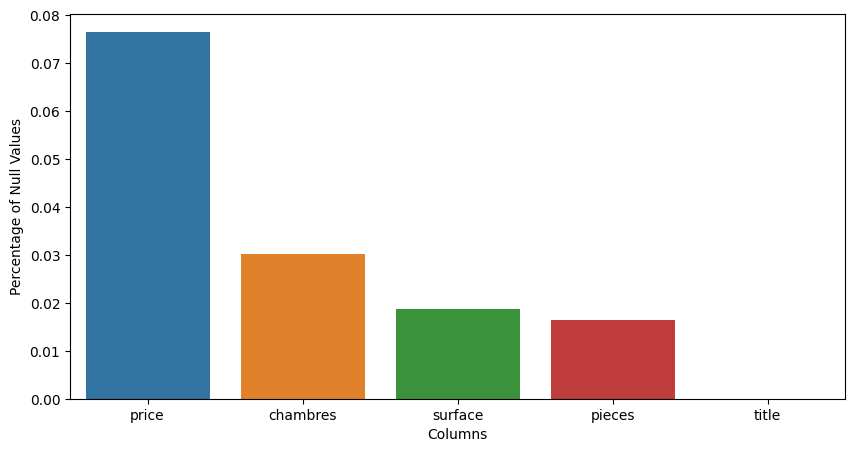

In [125]:
checkNullValues(df)

<h3> Suppression de certains columns qui vont faire partir de l'analyse </h3>

In [126]:
df = df.drop(["image","url","description"], axis=1)

<h3> Univariate Analysis </h3>

In [127]:
def countPlot(df:pd.DataFrame,x:str, percent:bool=True, size=(15,5))->None: # to plot a bargraph of percentage frequencies of a column
    plt.figure(figsize=size)
    chart = sns.countplot(
        data=df,
        x=x,
        order=df[x].value_counts().index
    )
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

    if percent==True: # to add value on the bar as percentage
        total = len(df[x])
        for p in chart.patches:
                percentage = f'{100 * p.get_height() / total:.3f}%\n'
                x = p.get_x() + p.get_width() / 2
                y = p.get_height()
                chart.annotate(percentage, (x, y), ha='center', va='center')
    else:
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
        for c in chart.containers:
            labels = [f'{(v.get_height()):.1f}' for v in c]
            chart.bar_label(c, labels=labels, label_type='edge')
    plt.ylabel('Percentage')
    plt.show()

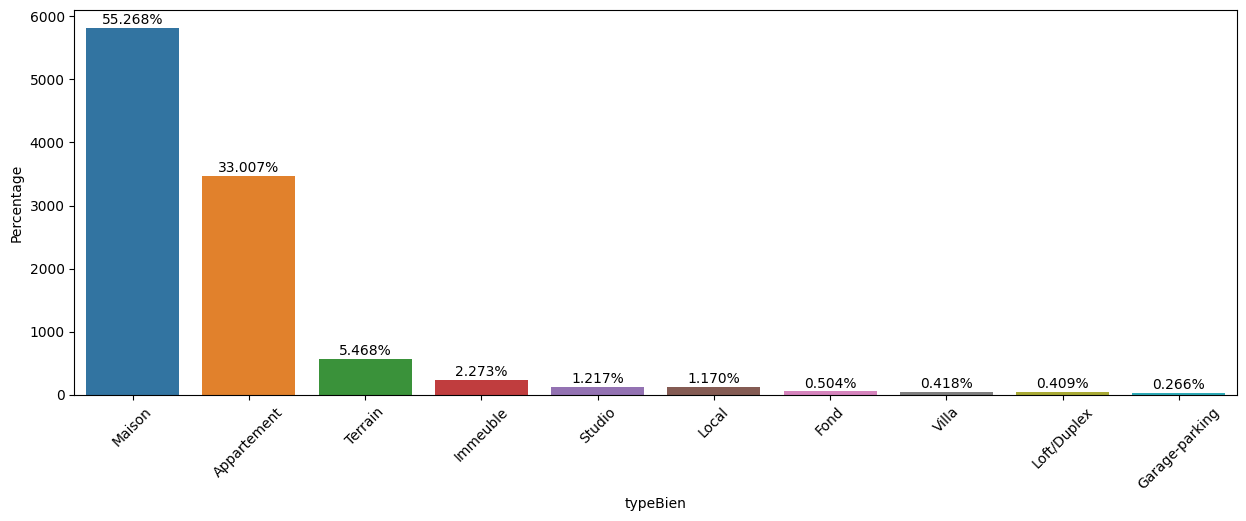

In [128]:
df_TypeVente = df.copy()
df_TypeVente = df_TypeVente.groupby('typeBien').filter(lambda x: len(x) > 20)
countPlot(df_TypeVente, "typeBien", True)

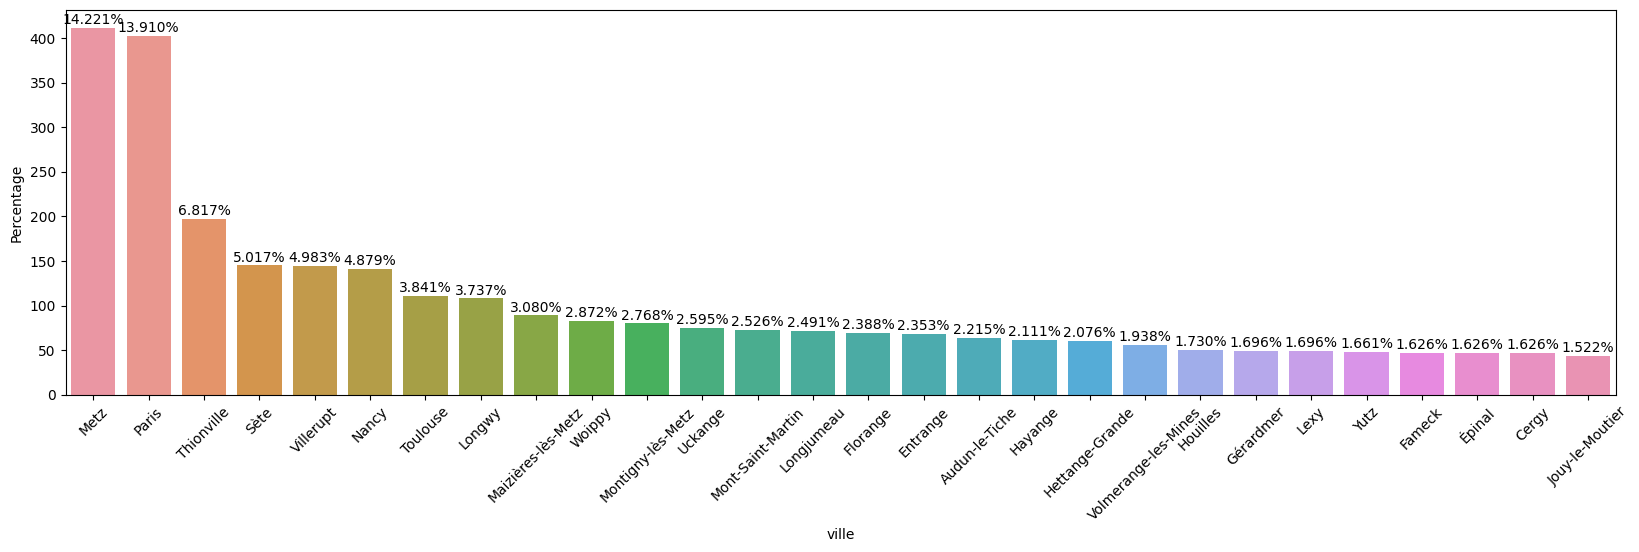

In [129]:
df_ville = df.copy()
df_ville = df_ville.groupby('ville').filter(lambda x: len(x) > 40)
countPlot(df_ville, "ville", True, (20,5))

In [130]:
def plot_boxplots(df: pd.DataFrame, column:str):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    axes[0].set_title(column[0])
    axes[1].set_title(column[1])
    axes[2].set_title(column[2])
    df.boxplot(column[0], ax=axes[0], vert=False)
    df.boxplot(column[1], ax=axes[1], vert=False)
    df.boxplot(column[2], ax=axes[2], vert=False)
    fig.suptitle("Boxplots du dataset")
    # Remove the automatic label generation on plots
    axes[0].set_yticklabels([""])
    axes[1].set_yticklabels([""])
    axes[2].set_yticklabels([""])
    plt.show()
def plot_histogram(df: pd.DataFrame, column:str):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    axes[0].set_title(column[0])
    axes[1].set_title(column[1])
    axes[2].set_title(column[2])
    df[column[0]].hist(bins=100, ax=axes[0])
    df[column[1]].hist(bins=100, ax=axes[1])
    df[column[2]].hist(bins=100, ax=axes[2])
    fig.suptitle("Distribution du dataset")
    # Remove the automatic label generation on plots
   
    plt.show()

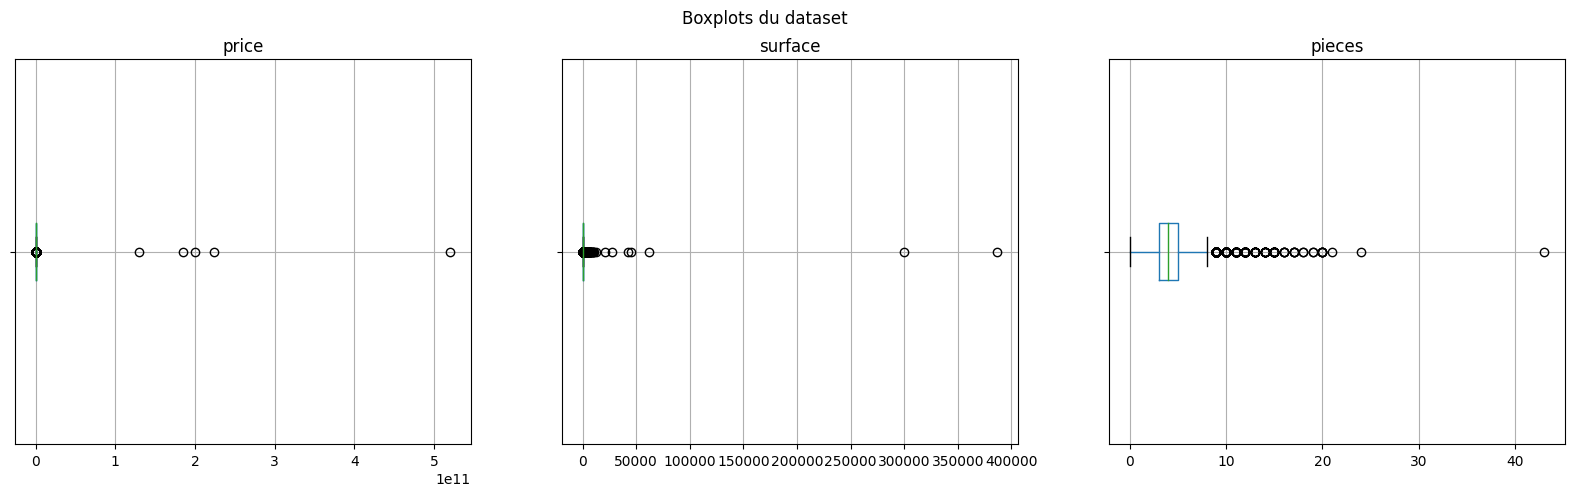

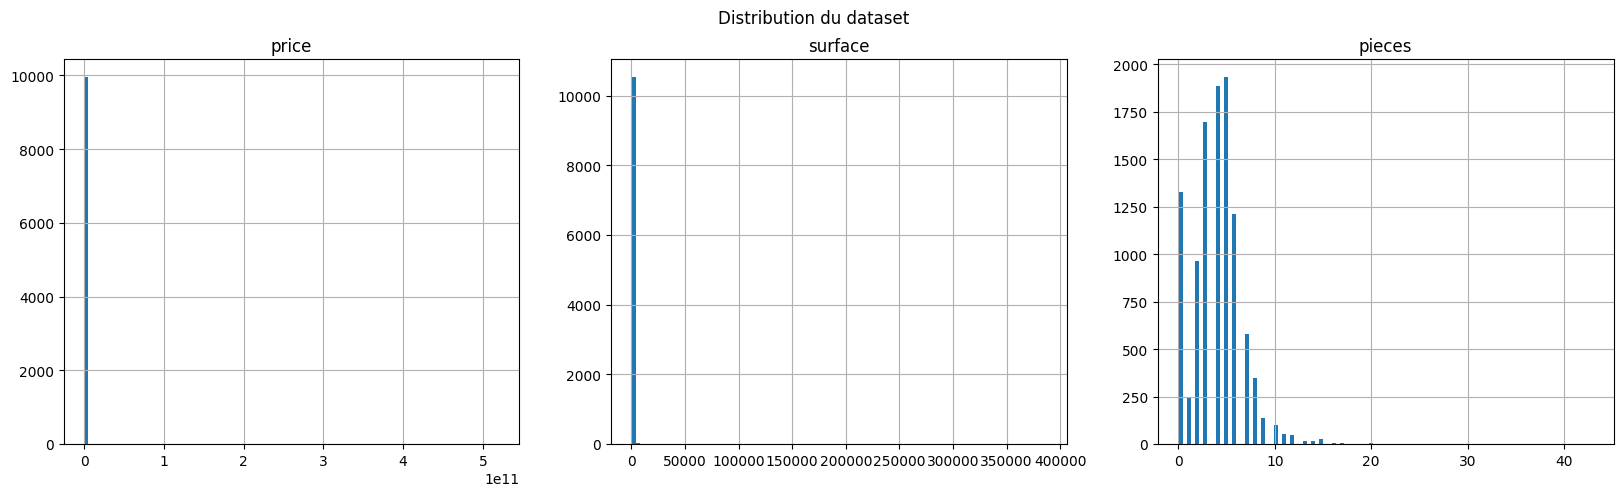

In [131]:
plot_boxplots(df, ["price", "surface", "pieces"])
plot_histogram(df,["price", "surface", "pieces"])

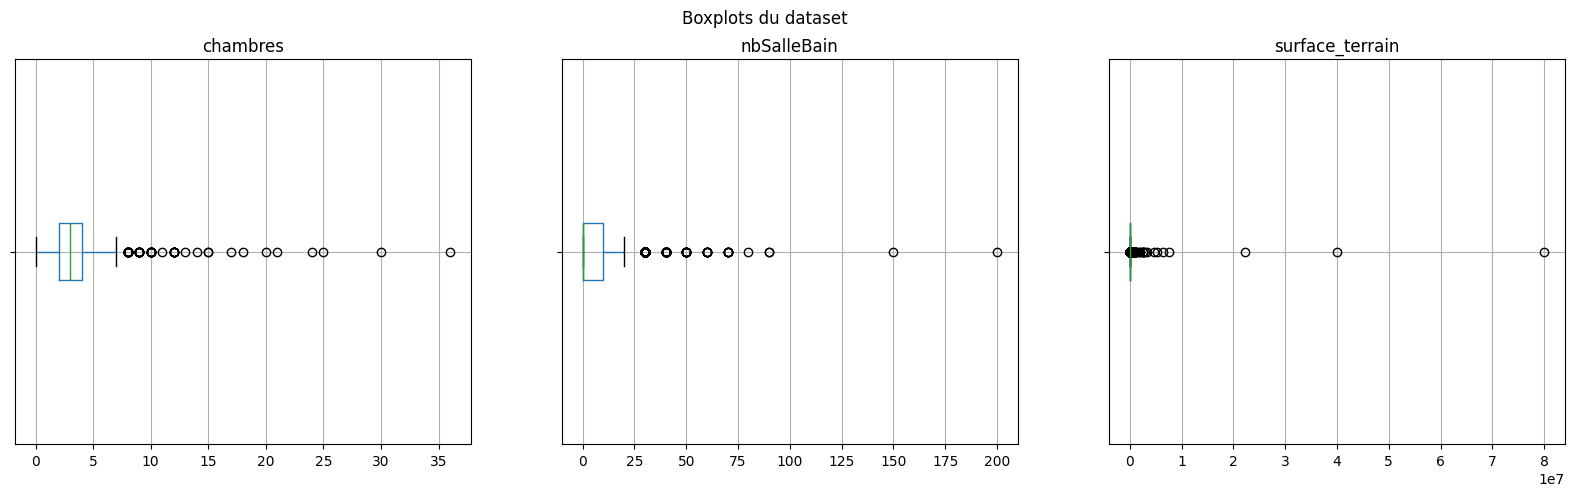

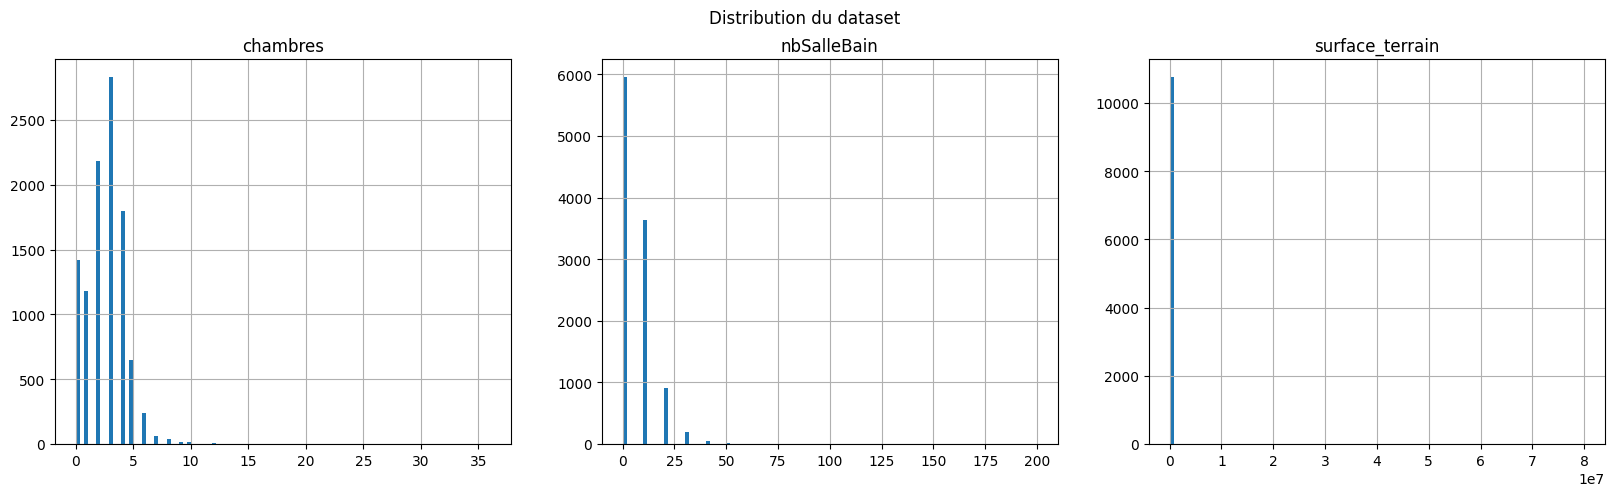

In [132]:
plot_boxplots(df, ["chambres", "nbSalleBain", "surface_terrain"])
plot_histogram(df,["chambres", "nbSalleBain", "surface_terrain"])

<h4> Suppression des outliers: </h4>
<p> 
    on va utiliser deux methodes percentiles et quartile.
</p>

<p> 
    on va definir une fonction permettant d'afficher la distribution d'une valeur avec une mise en valeur des outliers.
</p>

In [133]:
from typing import Union, Any, List, Iterable, Tuple, Dict, Callable

def plot_distribution_with_bounds(
    series: pd.Series,  
    bounds: Tuple[float, float],
    ax: plt.Axes = None,
    title: str = "",
    figsize: Tuple[float, float] = (10, 5),
    bins: int = 100,
):
    series.plot.hist(bins=bins, ax=ax)

    min, max = bounds
    ax.axvspan(0.0, min, color="red", alpha=0.5)
    ax.axvspan(max, series.max(), color="red", alpha=0.5)

In [134]:
def display_outliers_method(
    df: pd.DataFrame, 
    columns,
    method: Callable[[pd.Series, Any], Tuple[float, float]],
    **kwargs
):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 5))
    axes[0].set_title(columns[0])
    axes[1].set_title(columns[0])
    axes[2].set_title(columns[0])

    for idx, col in zip(range(3), columns):
        ax = axes[idx]
        ax.set_title(col)
        series = df[col]
        bounds = method(series, **kwargs)
        print(f"Bounds for column \"{col}\": {bounds}")
        plot_distribution_with_bounds(
            series,
            bounds,
            ax
        )
    plt.show()

<h4> Methode percentile : </h4>

In [135]:
def compute_percentile_bounds(
    series: pd.Series, 
    cutoff_percentage: float = 1.0
) -> Tuple[float, float]:
    """ Returns (lower, upper) bounds
    """
    quantile = cutoff_percentage / 100.0
    return series.quantile(quantile), series.quantile(1 - quantile)

Bounds for column "price": (25000.0, 1248000.0)
Bounds for column "surface": (2.0, 3002.0)
Bounds for column "pieces": (0.0, 12.0)


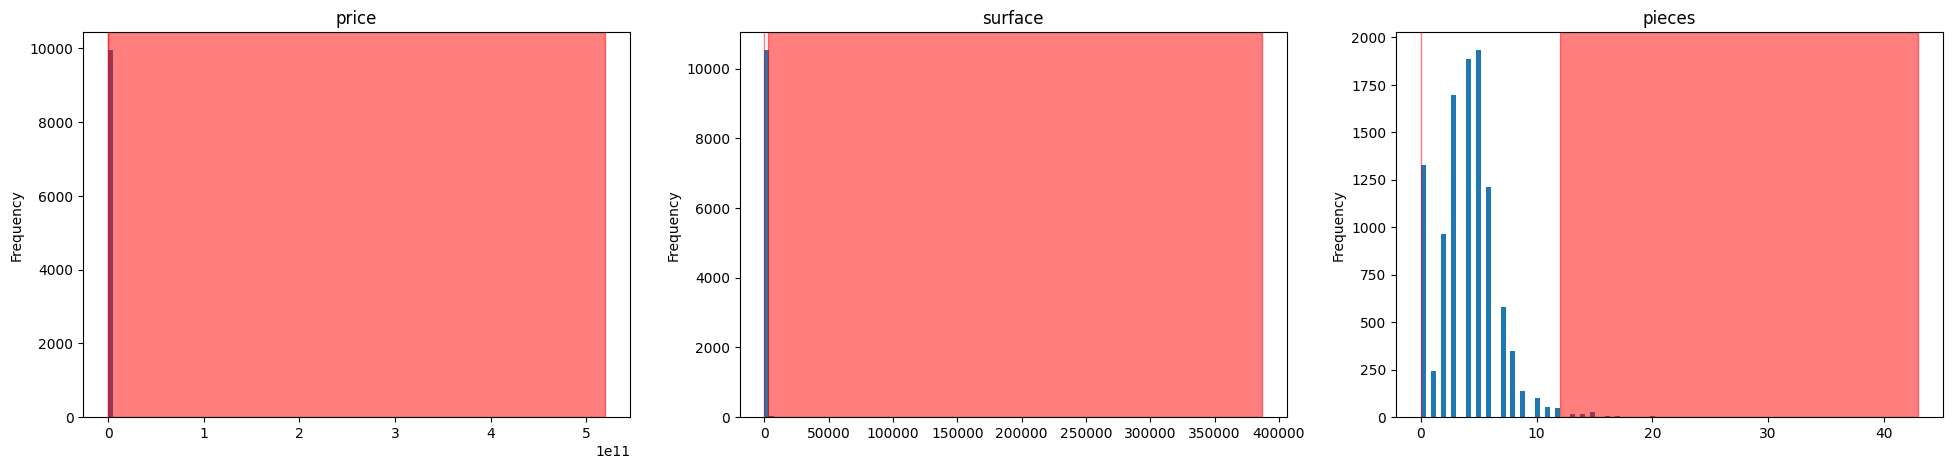

Bounds for column "chambres": (0.0, 7.0)
Bounds for column "nbSalleBain": (0.0, 30.0)
Bounds for column "surface_terrain": (0.0, 132087.0)


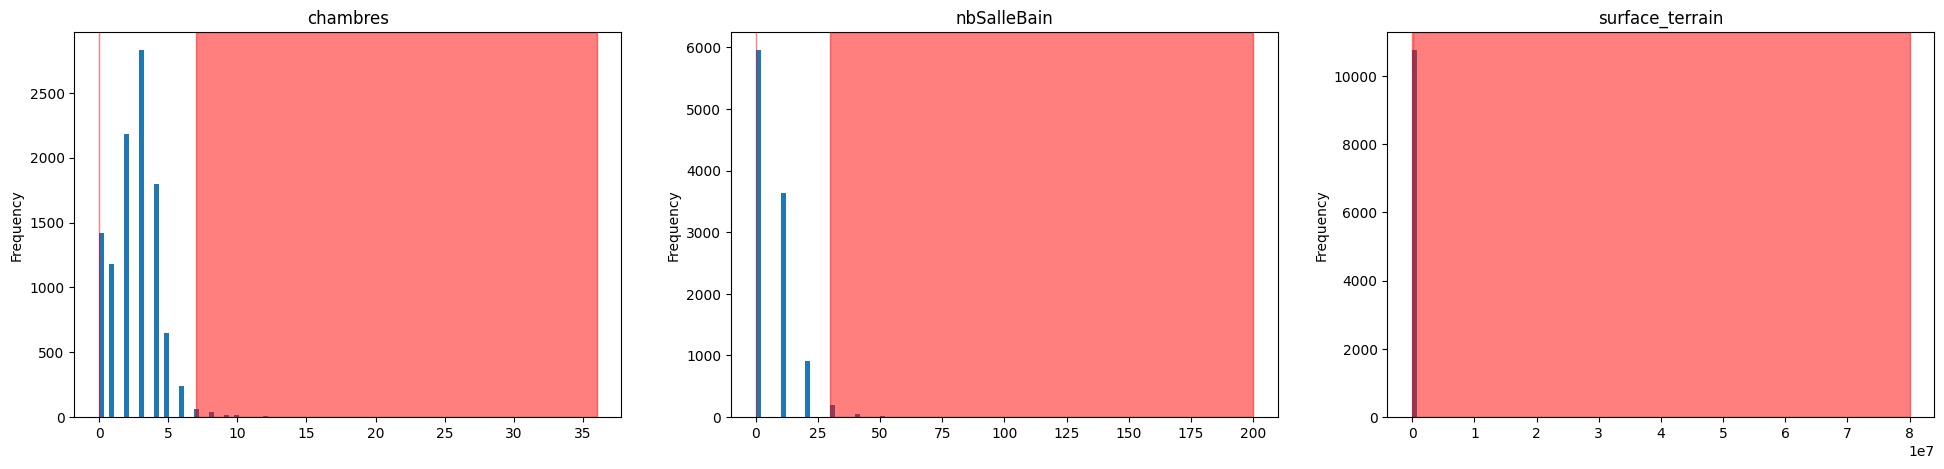

In [136]:
display_outliers_method(
    df,
    ("price", "surface", "pieces"),
    compute_percentile_bounds,
    cutoff_percentage = 1.0
)
display_outliers_method(
    df,
    ("chambres", "nbSalleBain", "surface_terrain"),
    compute_percentile_bounds,
    cutoff_percentage = 1.0
)

<h4> Method Interquartile Range: <h4>

In [137]:
def compute_interquartile_range_method(series: pd.Series) -> Tuple[float, float]:
    quantile_25, quantile_75 = series.quantile([0.25, 0.75])
    iqr = quantile_75 - quantile_25
    print(quantile_25, quantile_75)
    print(iqr)
    lower = quantile_25 - 1.5 * iqr
    upper = quantile_75 + 1.5 * iqr
    return lower, upper

Bounds for column "price": (25000.0, 1248000.0)
Bounds for column "surface": (2.0, 3002.0)
Bounds for column "pieces": (0.0, 12.0)


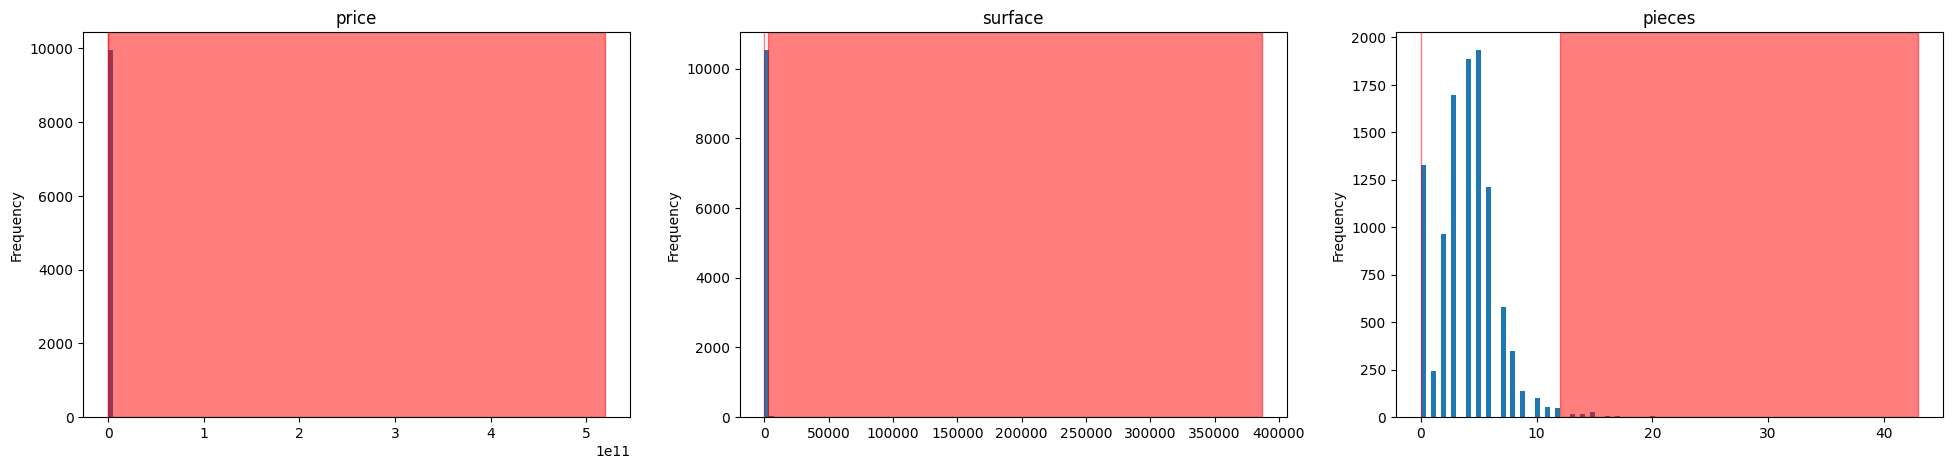

Bounds for column "chambres": (0.0, 7.0)
Bounds for column "nbSalleBain": (0.0, 30.0)
Bounds for column "surface_terrain": (0.0, 132087.0)


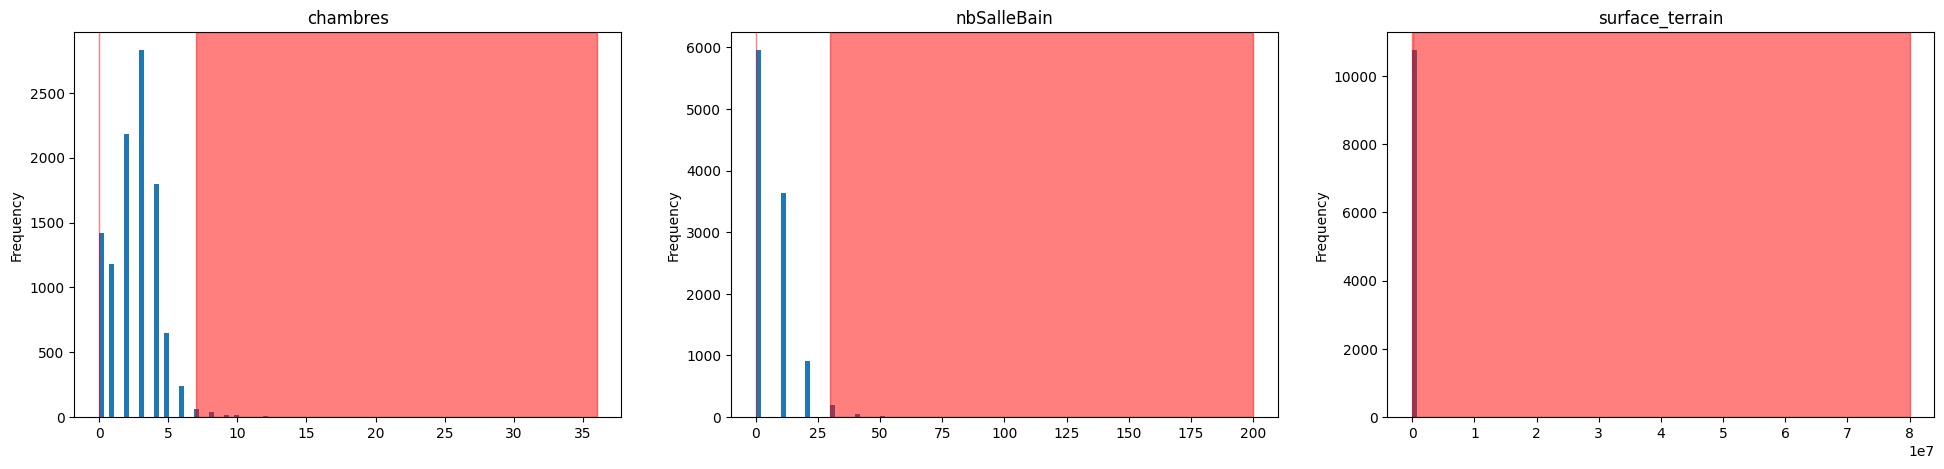

In [138]:
display_outliers_method(
    df,
    ("price", "surface", "pieces"),
    compute_percentile_bounds
)
display_outliers_method(
    df,
    ("chambres", "nbSalleBain", "surface_terrain"),
    compute_percentile_bounds
)

<h4> Comparaison: </h4>
<p> En se basant sur les deux resulats, on peut voir que la methode interquartile range detecte plus d'outliers. Plus d'outliers va resulter à supprimer plus de données. Donc on garde la permière où on supprime peu de données.<p>
<h4> Suppression d'outliers: Methode percentile</h4>


In [139]:
def remove_outliers(
    df: pd.DataFrame, 
    cols,
    method: Callable[[pd.Series, Any, Any], Tuple[float, float]],
    *args,
    **kwargs
) -> pd.DataFrame:
    for col in cols:
        series = df[col]
        bounds = method(series, *args, **kwargs)
        df = df[df[col].between(*bounds, inclusive="both")]
    return df

In [140]:
df = remove_outliers(
    df,
    ("price", "surface", "pieces"),
    compute_percentile_bounds,
    cutoff_percentage=1.0
)

In [141]:
df

title             ref  \
2      Vente Maison hors lotissement 5 pièces Rhône -...  paru-171334828   
3      Vente FERMETTE à rénover Sarthe - Annonce part...  paru-171308494   
4      Vente Maison 5 pièces Meurthe-et-Moselle - Ann...  paru-171334762   
5      Vente SAINT-CHAMAS 13 ? Maison 5 pièces ? 110m...  paru-171334092   
6      Vente Charmante maison de 115 m2 avec piscine ...  paru-170662468   
...                                                  ...             ...   
10913  Maison - 4 pièces - 100 m² - Flins-sur-Seine -...       door-5843   
10914  Appartement - 4 pièces - 72 m² - Flins-sur-Sei...       door-5735   
10915      Maison - 5 pièces - 90 m² - Menucourt - 95180       door-5804   
10916   Maison - 3 pièces - 94 m² - Sérifontaine - 60590       door-5769   
10917   Maison - 6 pièces - 104 m² - Hardricourt - 78250       door-5754   

          typeBien                ville     price  surface  pieces  cuisine  \
2             hors         Villeurbanne  429000.0   1222.0     5.0    False   
3           rnover   Marolleslesbraults  130000.0   1472.0     7.0    False   
4                5             Lunville  155000.0    692.0     5.0    False   
5               13          Saintchamas  518000.0   1102.0     5.0    False   
6           maison  Vignouxsurbarangeon  215000.0   1152.0     5.0     True   
...            ...                  ...       ...      ...     ...      ...   
10913       Maison      Flins-sur-Seine  287500.0    100.0     4.0     True   
10914  Appartement      Flins-sur-Seine  269000.0     72.0     4.0     True   
10915       Maison            Menucourt  316800.0     90.0     5.0     True   
10916       Maison         Sérifontaine  191860.0     94.0     3.0     True   
10917       Maison          Hardricourt  360000.0    104.0     6.0     True   

       surface_terrain  chambres  nbSalleBain  terrace/balcon  jardin  \
2                    0       4.0           20           False   False   
3                    0       3.0           10           False   False   
4                    0       3.0           10           False   False   
5                    0       3.0           10           False   False   
6                    0       3.0           10           False   False   
...                ...       ...          ...             ...     ...   
10913              180       3.0           10           False   False   
10914                0       3.0           20           False   False   
10915              393       3.0            0            True   False   
10916              201       2.0           10           False   False   
10917              645       4.0           10            True    True   

       garage/parking classEnergy gazEmission  
2               False           C           A  
3               False           E           F  
4               False          ND          ND  
5               False           C           A  
6               False           E           B  
...               ...         ...         ...  
10913            True           D           B  
10914            True           F           C  
10915            True          ND          ND  
10916            True          ND          ND  
10917            True           E           B  

[9183 rows x 16 columns]

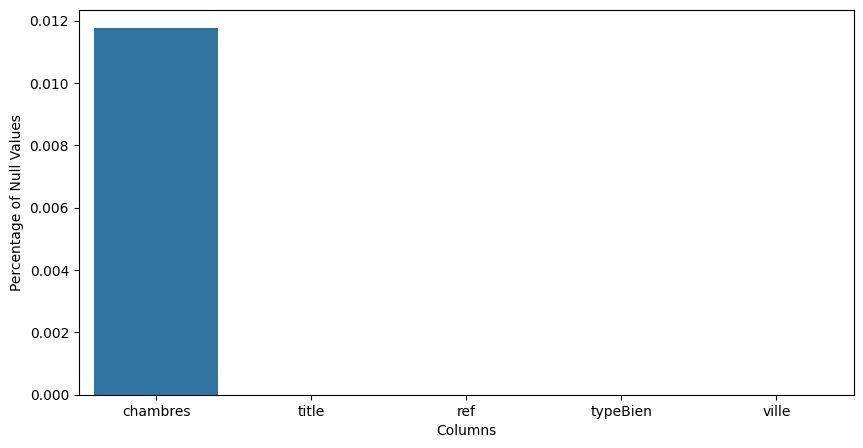

In [142]:
checkNullValues(df)

In [143]:
#df = pd.read_csv('finalDataset.csv', sep='\t', encoding='utf-8')